# Содержание

1. Цель и задачи проекта
2. Загрузка данных и ознакомление с ними
   - Подключение необходимых библиотек.
   - Считывание файла.
   - Ознакомление с данными.
   - Вывод.
3. Предобработка данных
   - Замена названий столбцов на корректный 'змеиный' регистр.
   - Работа с пропусками, Проверить наличие пропусков и возможность их замены на среднее, медианное или другие значения, которые помогут восполнить недостающие данные.
   - Работа с дубликатами. Нахождение строк-дубликатов и последующее удаление. Проверка на неявные дубликаты.
   - Замена типа данных. Приведение типа данных столбцов к корректному по смыслу и значению типу.
   - Замена значений на более удобный или корректный вид.
   - Вывод.
4. Исследовательский анализ данных
   - Оценка средних значений показателей для тех, кто ушел и тех, кто остался методом 'groupby'. Описание выводов по каждому из показателей.
   - Построение столбчатых гистограмм распределения признаков для тех, кто ушел (отток) и тех, кто остался (не попали в отток).
   - Группировка данных по 'churn' и оценка распределения клиентов относительно средств на балансе. Проверить возможное влияние нулевого баланса на отток клиентов.
   - Построение матрицы корреляций. Найти показатели влияющие на отток. Описать результаты, исключить мультикорреляцию.
   - Оценка распределения клиентов ушедших в отток и тех что остались в соответствии с городом.
   - Вывод.
5. Сегментация клиентов по количеству продуктов
   - Построение распределения количественных показателей. Оценить средние показатели по группам продуктов методом 'groupby', сделать выводы.
   - Построение распределения категориальных показателей. Оценить средние показатели по группам продуктов методом 'groupby', сделать выводы.
   - Вывод.
6. Формулировка и проверка гипотез
   - Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались. Сформулировать нулевую и альтернативную гипотезы. Выбрать пороговое значение alpha, проверить статистическую значимость данных, описать результаты.
   - Проверка гипотезы различия дохода между теми клиентами, кто пользуется 1-2 продуктами и теми, кто использует 3-4 продукта. Сформулировать нулевую и альтернативную гипотезы. Выбрать пороговое значение alpha, проверить статистическую значимость данных, описать результаты.
   - Вывод.
7. Общий вывод по проекту
8. Рекомендации
9. Презентация

## 1. Цель проекта

Проанализировать клиентов регионального банка в трех городах и выделить портрет клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных.
- Выделить портреты клиентов, которые склонны уходить из банка.
- Сформулировать гипотезы и проверить их статистическую значимость.
    *Сформулировать и проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    *Сформулировать и проверить гипотезу различия дохода между теми клиентами, кто пользуется 1-2 продуктами и теми, кто использует 3-4 продукта.*
- Описать выводы и сделать заключение.
- Составить рекомендации по снижению количества оттока у клиентов.

## Загрузка данных, подготовка и ознакомление с ними

### Подключение необходимых библиотек

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

### Считывание файла

In [114]:
data = pd.read_csv('/datasets/bank_dataset.csv')
display(data.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Ознакомление с данными

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Вывод

Были получены исходные данные, выведены первые 5 строк датафрейма, а так же информация о типах данных в столбцах.

## Предобработка данных

### Замена названий столбцов на корректный 'змеиный' регистр

In [116]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid': 'user_id',
                            'creditcard': 'credit_card'})
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Все названия столбцов были приведены к строчному регистру, а названия двух столбцов к 'змеиному' регистру.

### Работа с пропусками. Проверить наличие пропусков и возможность их замены на среднее медианное или другие значения, которые помогут восполнить недостающие данные

In [117]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Исследуем возможные причины появления пропусков

In [126]:
data.query('city == "Ярославль"').isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             2418
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [160]:
data.query('city == "Рыбинск"').isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             1199
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [159]:
data.query('city == "Рыбинск" and loyalty == 1').isna().sum()

user_id               0
score                 0
city                  0
gender                0
age                   0
objects               0
balance             613
products              0
credit_card           0
loyalty               0
estimated_salary      0
churn                 0
dtype: int64

Пропуски есть только в банках этих двух городов, в данных клиентов из Ростова Великого пропусков нет. Т.к. пропуски есть и среди активных клиентов тоже, версию с тем что NaN это новые клиенты можно исключить.
Возможно там нет клиентов чей баланс равен нулю.
Другая версия в том что NaN это закрытые счета, а в Ростове такие клиенты в статистику не попали.

Пропуски обнаружены только в столбце 'balance', в нем хранятся данные о сумме денег на счете. Заменем пропуски на ноль, т.к. NaN обозначает что на счету нет средств.

In [80]:
data['balance'] = data['balance'].fillna(0)
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Работа с дубликатами. Нахождение строк-дубликатов и последующее удаление. Проверка на неявные дубликаты.

In [81]:
data.duplicated().sum()

0

Дубликаты не обнаружены.

In [82]:
data.nunique()

user_id             10000
score                 460
city                    3
gender                  2
age                    70
objects                11
balance              6382
products                4
credit_card             2
loyalty                 2
estimated_salary     9999
churn                   2
dtype: int64

Неявные дубликаты так же не обнаружены, города имеют однородную запись, столбцы с 0 и 1 или 'М' и 'Ж' лишних значений не имеют.

### Замена типа данных. Приведение типа данных столбцов к корректному по смыслу и значению типу.

In [83]:
data['estimated_salary'] = round(data['estimated_salary']).astype('int')
data['balance'] = round(data['balance']).astype('int')
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0,1,1,1,101349,1
1,15690047,608,Рыбинск,Ж,41,1,83808,1,0,1,112543,0
2,15662040,502,Ярославль,Ж,42,8,159661,3,1,0,113932,1
3,15744090,699,Ярославль,Ж,39,1,0,2,0,0,93827,0
4,15780624,850,Рыбинск,Ж,43,2,125511,1,1,1,79084,0


Столбец 'estimated_salary' отвечающий за доход клиентов, был округлен и приведен к целочисленному типу (до рубля).

### Замена значений на более удобный или корректный вид

In [84]:
data['gender'] = data['gender'].map({'Ж': 0, 'М': 1})
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,0,42,2,0,1,1,1,101349,1
1,15690047,608,Рыбинск,0,41,1,83808,1,0,1,112543,0
2,15662040,502,Ярославль,0,42,8,159661,3,1,0,113932,1
3,15744090,699,Ярославль,0,39,1,0,2,0,0,93827,0
4,15780624,850,Рыбинск,0,43,2,125511,1,1,1,79084,0


### Вывод

Все названия столбцов были приведены к строчному регистру, а названия столбцов: 'user_id' и 'estimated_salary' к 'змеиному'.
В столбце 'balance' было обнаружено 3617 строк с отсутствующими значениями. Они были заменены на 0 - счета с нулевым балансом. Строк-дубликатов не было обнаружено, как и неявных дубликатов. Значения столбцов 'balance' и 'estimated_salary' были округлены и приведены к целочисленному типу данных, что вносит удобство и не влияет на математическую значимость. Столбец 'gender' был преобразован, значения 'Ж' и 'М' были заменены на 0 и 1 соответственно.

## Исследовательский анализ данных

### Оценка средних значений показателей для тех кто ушел и тех кто остался методом 'groupby'

In [85]:
data_group = data.groupby('churn').mean().reset_index()
data_group.head()

,churn,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,1.573390e+07,651.853196,0.572523,37.408389,5.033279,72745.301896,1.544267,0.707146,0.554565,99738.386161
1,1,1.573279e+07,645.351497,0.440844,44.837997,4.932744,91108.538046,1.475209,0.699067,0.360825,101465.682376


In [86]:
data_group = data.groupby('churn').mean().reset_index().drop('user_id', axis=1)
data_group.head()

,churn,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,651.853196,0.572523,37.408389,5.033279,72745.301896,1.544267,0.707146,0.554565,99738.386161
1,1,645.351497,0.440844,44.837997,4.932744,91108.538046,1.475209,0.699067,0.360825,101465.682376


Большинство показателей имеют минимальные различия

score — баллы кредитного скоринга, этот показатель отвечает за кредитоспособность, чем он выше, тем более благонадежным считается клиент. Здесь влияние на отток очень слабое, разница в пользу оставшихся всего в 1%.

gender - женщины уходят чаще чем мужчины.

age - в среднем клиенты более старшего поколения уходят чаще.

objects - здесь так же различия минимальны, в среднем клиенты имеют около 5 объектов недвижимости.

balance - этот показатель не оказывает существенного влияния на отток, различия среднего в 1% в пользу ушедших, однако в этом столбце много пропусков.

products - небольшой перевес на стороне действующих клиентов, в среднем в обоих случаях это 1-2 продукта.

creditcard - значения примерно равны, обе группы пользуются кредитными картами, показатель не влияет на отток.

loyalty - здесь заметное влияние на отток, процент ушедших среди активные клиентов ниже.

estimated_salary - здесь так же не видно значимых отличий 1-2% в пользу ушедших клиентов, их доход чуточку выше.

### Построение столбчатых гистограмм распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

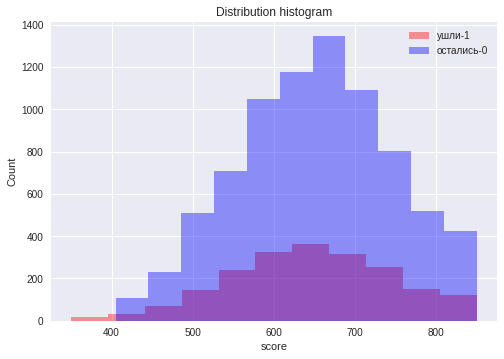

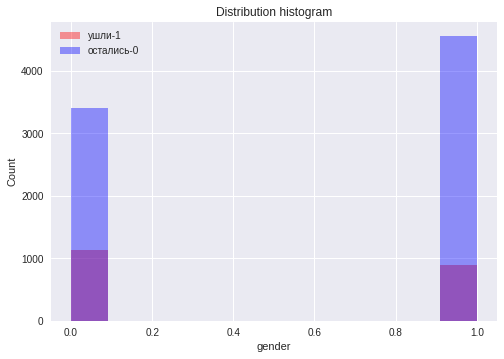

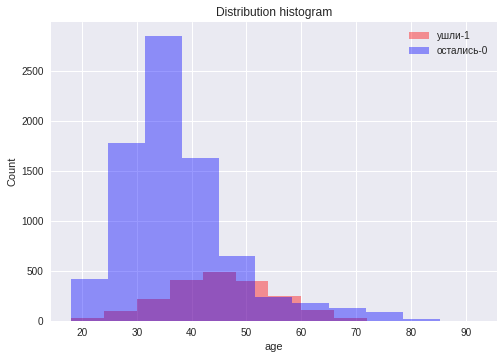

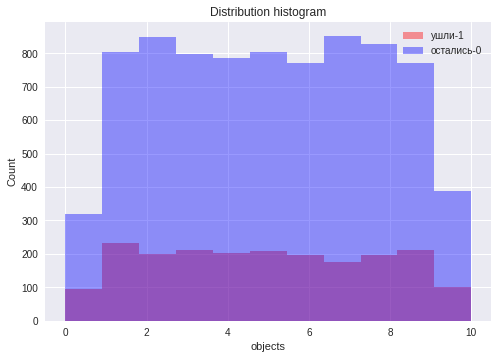

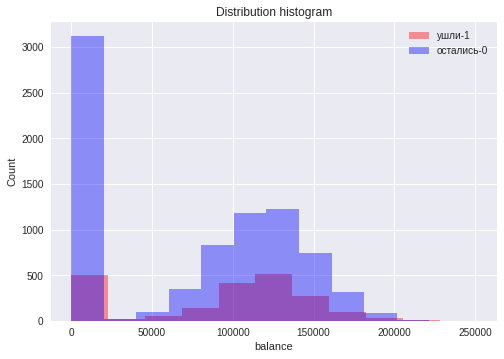

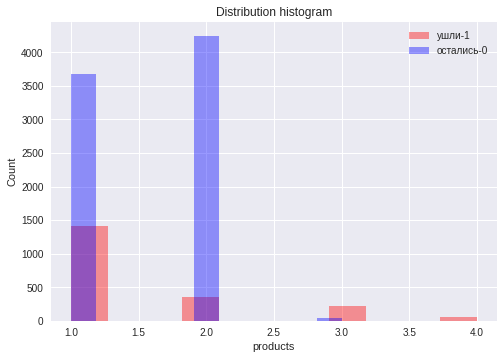

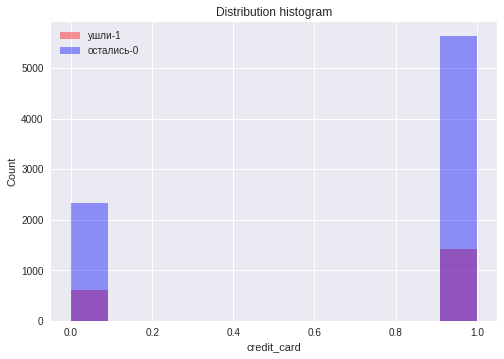

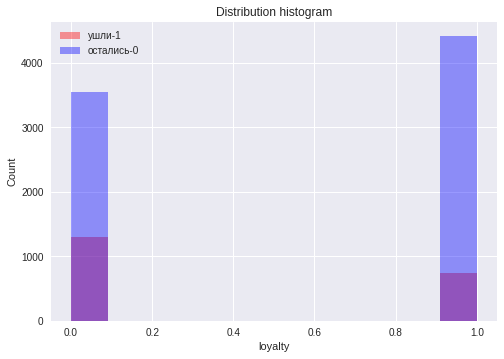

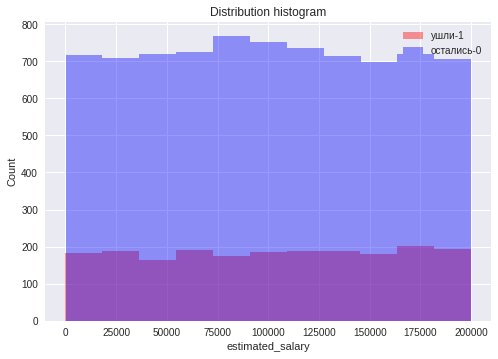

In [87]:
for i in data.drop(['churn', 'user_id', 'city'], axis=1).columns:
    sns.distplot(data.query('churn == 1')[i], bins=11, kde=False, color='red',label='ушли-1')
    sns.distplot(data.query('churn == 0')[i], bins=11, kde=False, color='blue',label='остались-0')
    plt.style.use('seaborn')
    plt.title('Distribution histogram')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Из распределения признаков видно:
Те кто имеют баллы кредитного скоринга в районе 400 и ниже покидают банк. В остальном этот показатель носит равномерный характер.
Среди клиентов мужчин больше и они реже уходят из банка.
Старшее поколение имеют больший процент оттока, стоит сделать программу обслуживания более простой и доступной.
Больший процент оттока среди тех клиентов кто совсем не имеет объектов собственности или же в их владении он только один. Лучшие показатели у клиентов с 7-ю и 2-мя объектами. 
Этот показатель стоит рассмотреть отдельно.
Основная часть людей пользуется 1 или 2 продуктами. Клиенты пользующиеся 4 продуктами в 100% случаях покидают банк, также среди тех кто пользуется 3 продуктами процент оттока весьма высок. Во 2-ой группе процент оттока самый низкий.
Процент ушедших клиентов среди тех кто имеет кредитную карты и нет примерно одинаков. Этот показатель крайне слабо влияет на отток.
Активных пользователей среди оставшихся клиентов банка значительно больше.
Нет заметных различий в оттоке клиентов относительно их доходов.

### Группировка данные по 'churn' и оценка распределения клиентов относительно средств на балансе.

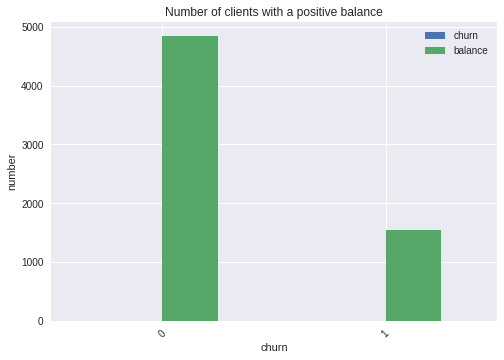

In [88]:
ax1 = data.query('balance > 0').groupby('churn').agg({'balance': 'count'}).reset_index().plot(kind='bar', grid=True)
plt.style.use('seaborn')
ax1.set_title('Number of clients with a positive balance')
ax1.set_xlabel('churn')
ax1.set_ylabel('number')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.show()

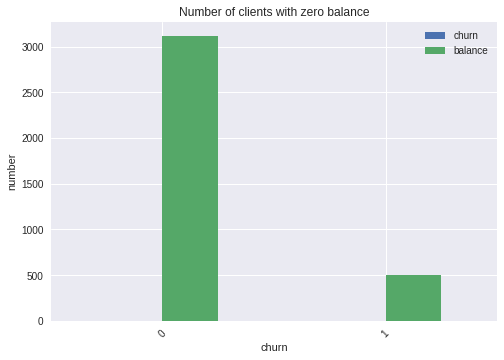

In [89]:
ax1 = data.query('balance == 0').groupby('churn').agg({'balance': 'count'}).reset_index().plot(kind='bar', grid=True)
plt.style.use('seaborn')
ax1.set_title('Number of clients with zero balance')
ax1.set_xlabel('churn')
ax1.set_ylabel('number')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.show()

В обоих случаях там где баланс больше нуля и там где он равен нулю, преимущество на стороне оставшихся клиентов.

### Построение матрицы корреляций

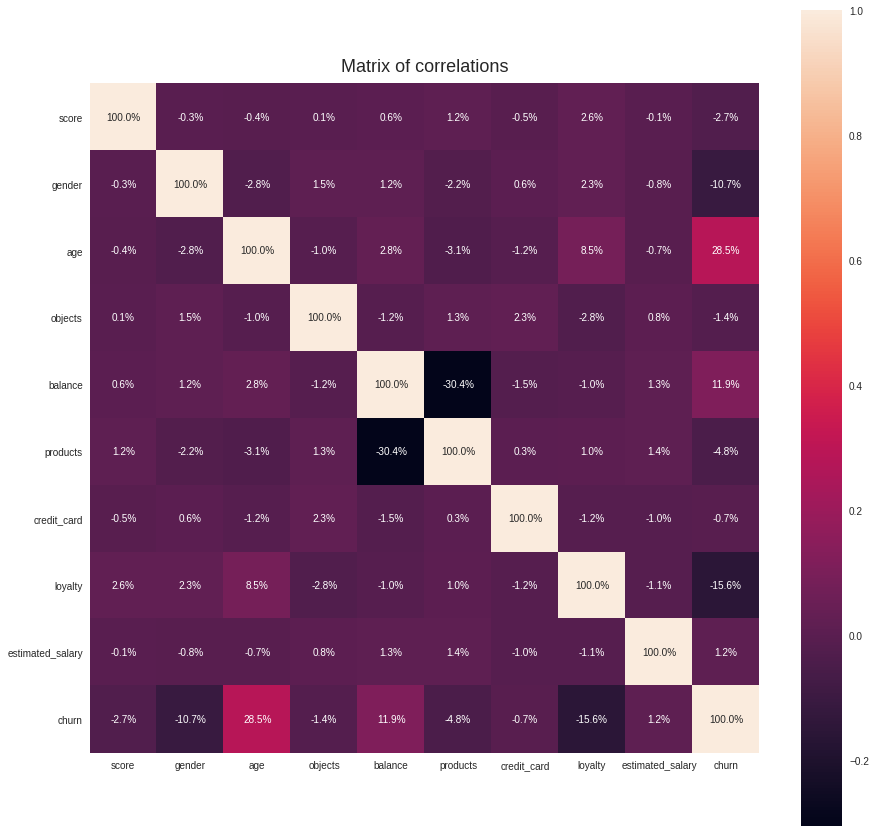

In [90]:
data_corr = data.drop('user_id', axis=1).corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(data_corr, square=True, annot=True, fmt='.1%')
sns.set_palette('dark')
ax.set_title('Matrix of correlations', fontdict={'fontsize':18}, pad=12)
plt.show()

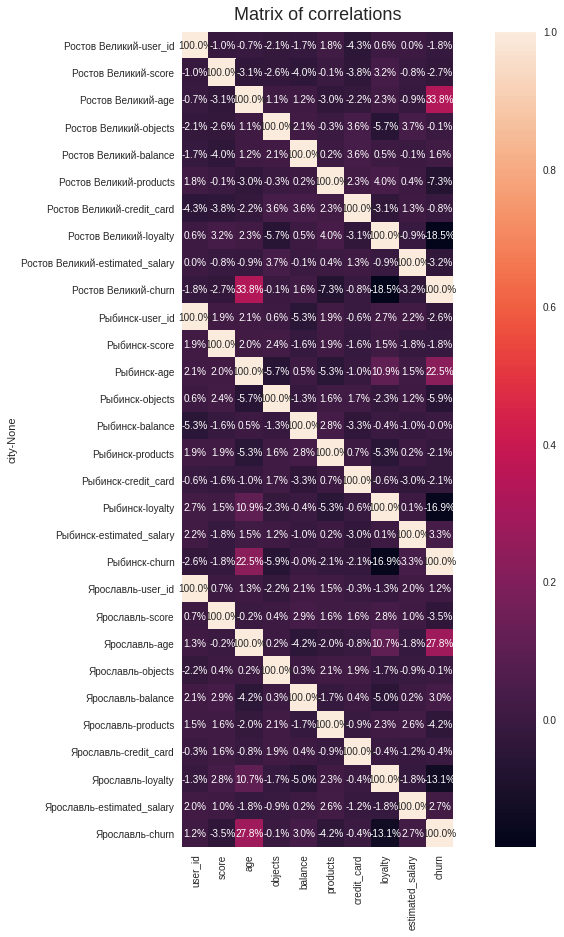

In [162]:
data_corr = data.groupby('city').corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(data_corr, square=True, annot=True, fmt='.1%')
sns.set_palette('dark')
ax.set_title('Matrix of correlations', fontdict={'fontsize':18}, pad=12)
plt.show()

Относительно всех трех городов высокое влияние на отток оказывает возраст клиента. Зависимость прямая т.е. чем больше возраст тем выше вероятность ухода клиента. Так же у всех прослеживается и зависимость от активности клиента, она разумеется обратная - чем сильнее признак (1=активный) тем меньше отток. Небольшие зависимости от 'products' появились в Ярославле и в Ростове, они обратные, что говорит о том, что чем меньшим числом продуктов пользуется клиент (1), тем выше вероятность его ухода. В Рыбинске обратная зависимость от 'objects', чем меньше у клиента объектов в собственности (0 или 1) тем выше вероятность ухода.

По результатам матрицы корреляций можно выделить три признака которые оказывают влияние на отток клиентов: 'gender', 'age' и 'loality'. Как и видно из предыдущего исследования активные пользователи реже уходят, а более старшее поколение склонно покидать банк. Среди клиентов процент мужчин выше и они реже уходят из банка.
Показатель 'balance' обрел корреляционную значимость только после замены NaN на 0. По предыдущему исследованию влияния на отток этого показателя не было обнаружено.
Так же небольшое влияние оказывает показатель числа продуктов 'products'.
Мультикорреляции признаков не наблюдается.

### Оценка распределения клиентов ушедших в отток и тех что остались в соответствии с городом

Построим сводную таблицу, где строками будут данные об активности пользователей, а столбцы будут распределены по городам. В качестве значений будет взят средний показатель оттока из столбца 'churn'.

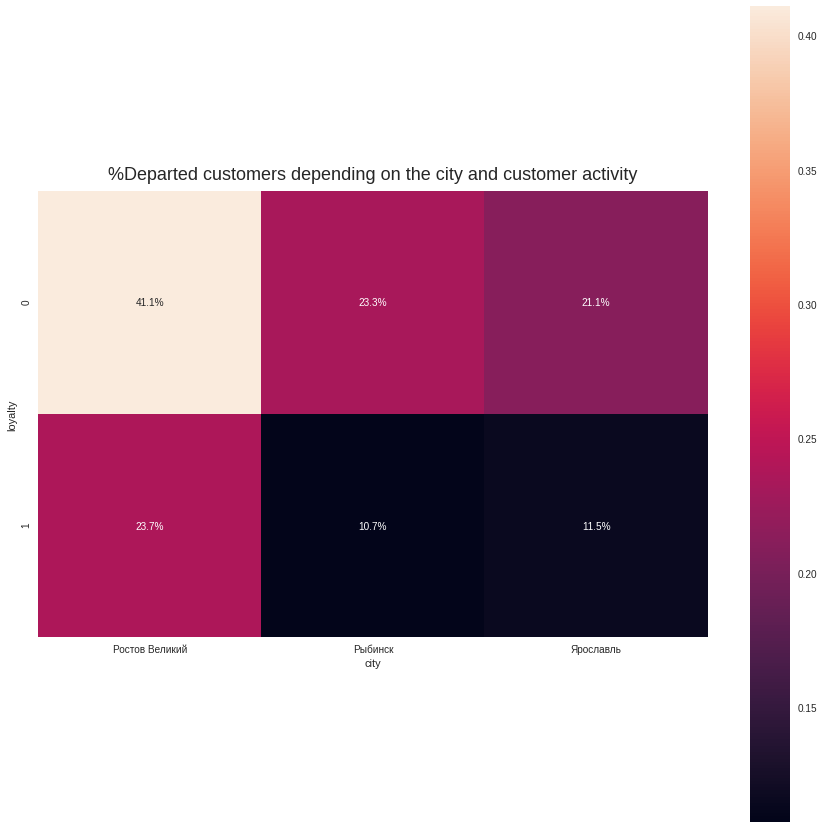

In [91]:
data_pivot_city = data.pivot_table(index='loyalty', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(15,15))
ax = sns.heatmap(data_pivot_city, square=True, annot=True, fmt='.1%')
sns.set_palette('dark')
ax.set_title('%Departed customers depending on the city and customer activity', fontdict={'fontsize':18}, pad=12)
plt.show()

Хуже всего результаты в Ростове, там показатели оттока среди активных пользователей и нет больше примерно в 2 раза.
В Ярославле и Рыбинске отток примерно на одном уровне, разница не более 2%

Вывод
Из матрицы корреляций видно, что на вероятность оттока влияют возраст, активность клиента, пол, баланс на счете и количество продуктов. Хотя у последнего показатель весьма слабый имеено здесь наблюдаются статистические различия, как к примеру клиенты с 4-мя продуктами, которые в 100% случаях покидают банк. Относительно географических критериев хуже всего обстоят дела в Ростове Великом, где показатели оттока в 2 раза выше чем в двух других городах, там же показатели примерно равны. Что касается таких признаков как: 'score', 'estimated_salary' и 'objects' то здесь результаты носят равномерный характер. Можно выделить клиентов которые имеют в собственности 1 объект или не имеют вовсе, среди них вероятность оттока выше. Как уже говорилось, кредитный скоринг не оказывает значимого влияния на отток, лишь небольшое число клиентов, чья оценка колеблится около 400 уходят из банка.

## Сегментация клиентов по количеству продуктов

### Построение распределения количественных показателей

Проведем сегментацию клиентов относительно количества продуктов, так мы сможем лучше понять портрет пользователя склонного разорвать сотрудничество и уйти из банка. Именно этот показатель дает значимые различия относительного своего значения.

In [92]:
data_group_count = data.groupby('products')[['score', 'balance', 'age', 'estimated_salary']].mean().reset_index()
data_group_count.head()

,products,score,balance,age,estimated_salary
0,1,649.120968,98551.879032,39.673092,99487.255114
1,2,652.188671,51879.144880,37.753595,100452.010022
2,3,648.105263,75458.338346,43.195489,104318.078947
3,4,653.583333,93733.083333,45.683333,104763.733333


Здесь 'age' был выбран как количественный признак.

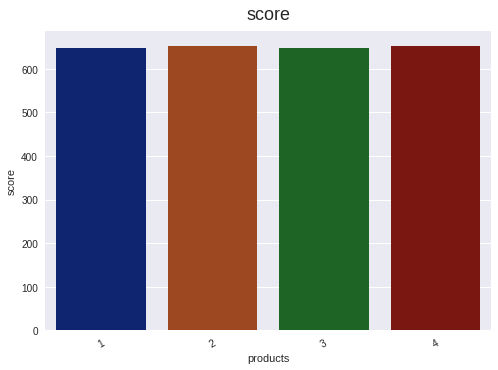

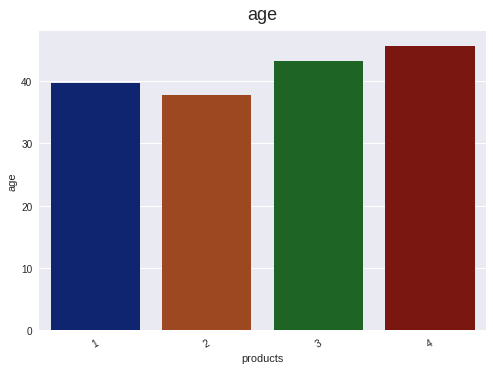

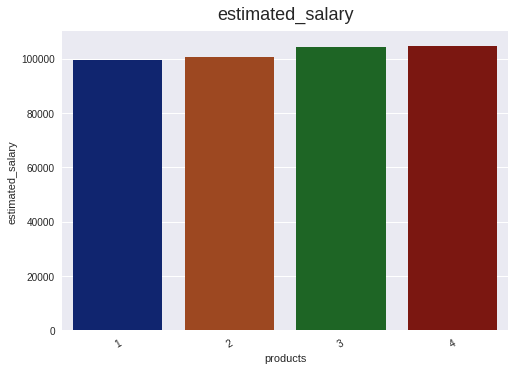

In [93]:
for i in data_group_count.drop(['products', 'balance'], axis=1).columns:
    ax = sns.barplot(x=data_group_count['products'], y=data_group_count[i])
    sns.set_palette('dark')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    ax.set_title(i, fontdict={'fontsize':18}, pad=12)
    plt.show()

Средний показатель кредитного скоринга во всех 4-ех группах одинаков, можно сказать что этот параметр не влияет на отток клиентов.

Самый высокий возраст клиентов в 4 группе где отток составляет 100%, в 3-ей он так же высок. А самые молодые клиенты входят во 2-ю группу.

Средний доход в 'неуспешных' группах чуть выше (3 и 4) около 4% в 1 и 2 он примерно равен.

Отдельно посмотрим на распределение показателей баланса клиентов с счетами больше нуля и равным нулю. Построим heatmap взаимного распределения показателей баланса с гендерным различием и разделением на отток по продуктам.

In [94]:
data_balance_zero = data.query('balance == 0').pivot_table(
    index=['gender', 'churn'], columns='products', values='balance', aggfunc='count')

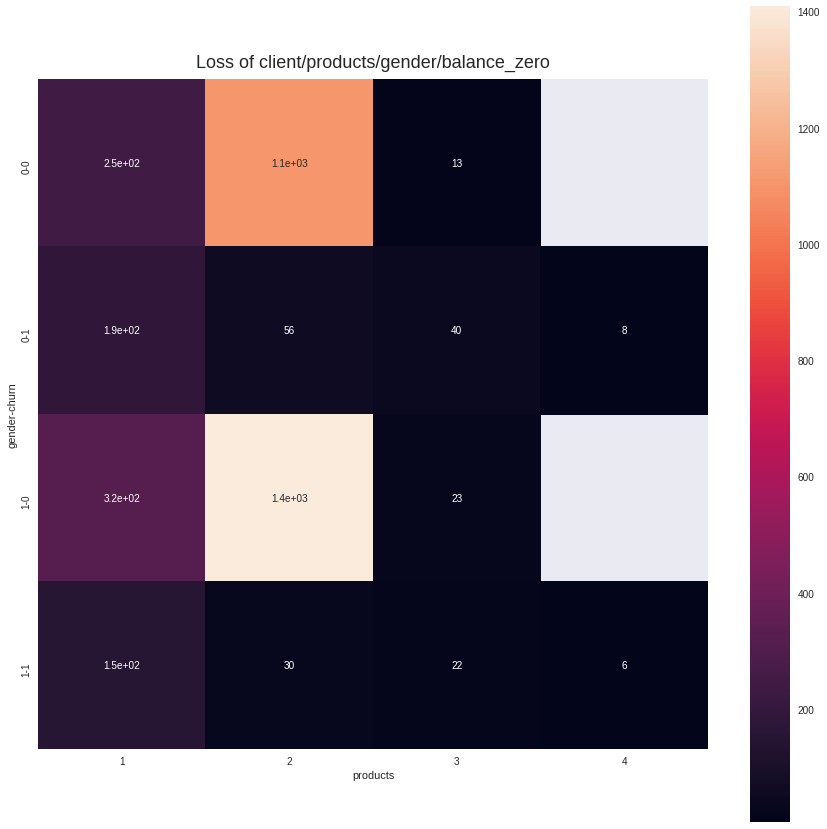

In [95]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(data_balance_zero, square=True, annot=True)
sns.set_palette('dark')
ax.set_title('Loss of client/products/gender/balance_zero', fontdict={'fontsize':18}, pad=12)
plt.show()

In [96]:
data_balance_count = data.query('balance > 0').pivot_table(
    index=['gender', 'churn'], columns='products', values='balance', aggfunc='count')

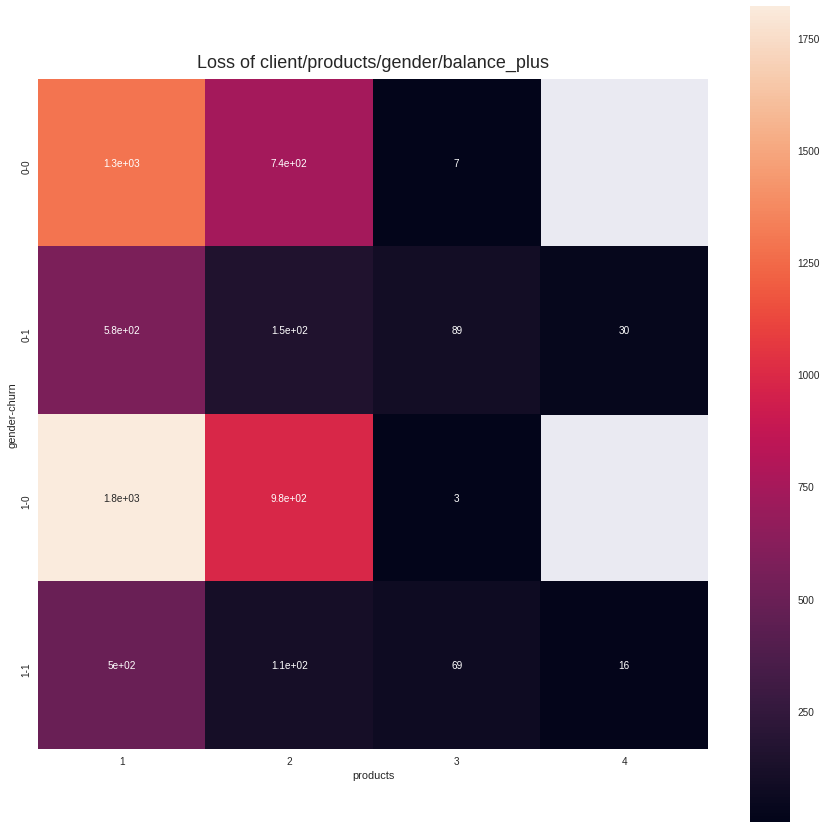

In [97]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(data_balance_count, square=True, annot=True)
sns.set_palette('dark')
ax.set_title('Loss of client/products/gender/balance_plus', fontdict={'fontsize':18}, pad=12)
plt.show()

В 3 и 4 группе маленькое количество клиентов потому там и показатели небольшие, а вот во второй группе практически нет оттока среди клиентов с нулевым счетом и их там больше чем в первой. В первой группе преобладают клиенты с положительным балансом и в ней отток в сравнении со второй довольно высок, В обоих случаях женщины уходят чаще.

### Построение распределения категориальных показателей

In [98]:
data_group_count = data.groupby('products')[['city', 'gender', 'objects', 'credit_card', 'loyalty', 'churn']].mean().reset_index()
data_group_count.head()

,products,gender,objects,credit_card,loyalty,churn
0,1,0.548387,4.974626,0.703777,0.504131,0.277144
1,2,0.551198,5.051852,0.707190,0.532898,0.075817
2,3,0.439850,5.003759,0.714286,0.424812,0.827068
3,4,0.366667,5.300000,0.683333,0.483333,1.000000


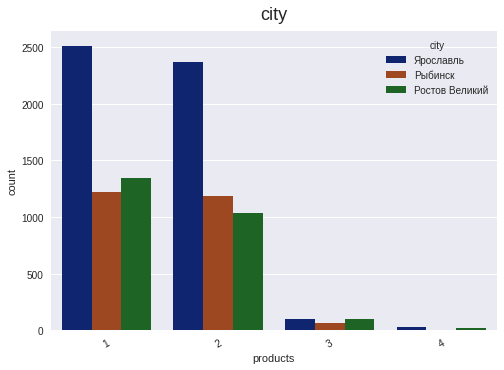

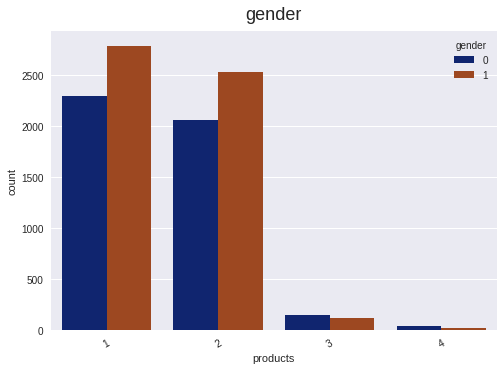

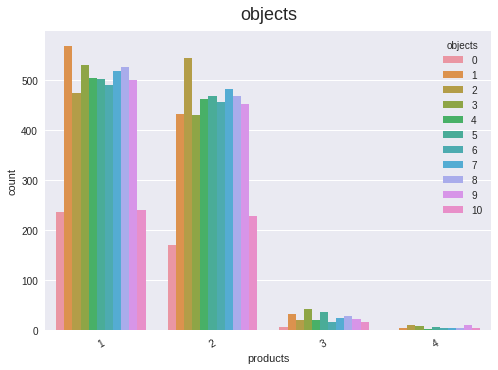

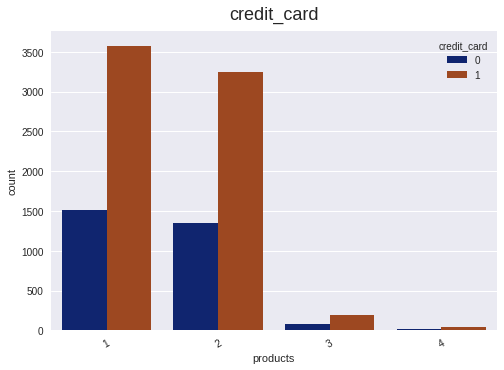

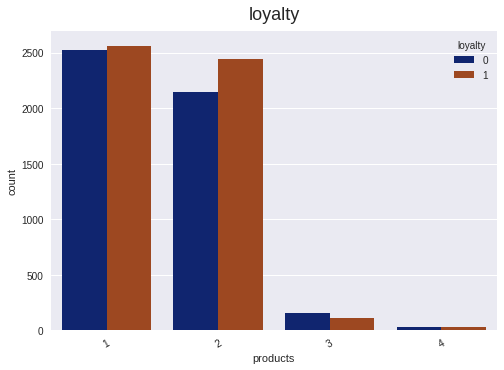

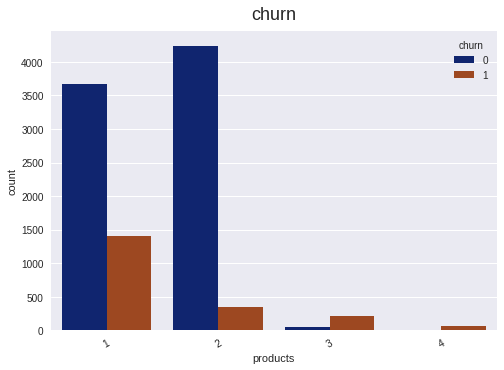

In [99]:
for i in data.drop(['products', 'user_id', 'score', 'age', 'balance', 'estimated_salary'], axis=1).columns:
    ax = sns.countplot(x='products', hue=i, data=data)
    sns.set_palette('dark')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    ax.set_title(i, fontdict={'fontsize':18}, pad=12)
    plt.show()

В распределении по продуктам среднее столбца 'objects' принимает примерно равное значение, потому будет более информативным рассмотреть его как категориальный признак.

Клиентов из трех городов примерно равное количество в 3 и 4 группах. В двух других явное преимущество за Ярославлем, в 1-ой группе второе место за Ростовом, во 2-ой за Рыбинском.

В группах 1 и 2 преобладают мужчины, а в 3 и 4 женщины, отсюда и небольшая корреляционная зависимость.
В 4-ой группе присутствуют почти все объекты и представлены в малых значениях. В 3-ей группе лидерство за 2-мя объектами, в остальном разница между другими объектами небольшая.
Во 2-ой группе лидируют клиенты с 2-мя и 7-ю объектами, это группы с самым малым оттоком, отсюда и успешная динамика.
В 1-ой группе лидерство за 1-им объектом где отток имеет одни из самых высоких показателей по объектам.

Во всех 4-ех группах преобладание за клиентами имеющими в наличии кредитную карту.

Как нам известно активные клиенты имеют меньшую вероятность ухода. В 1-ой группе количество активных клиентов и нет примерно одинаково, Во 2-ой преимущество за активными клиентами, в 3-ей же наоборот активных меньше, а в 4-ой количество активных и нет распределено поровну.

Здесь уже известная нам картина, 4 группа в 100% случаях уходит из банка, высокий процент в 3-ей, самой успешной является группа клиентов пользующихся 2-мя продуктами.

Вывод
Сегментация по группам показала, что самой успешной является группа, где клиенты пользуются двумя продуктами. 3 и 4 группы имеют высокий показатель оттока (в 4-ой 100%), там же преобладат более старшее поколение. Женщины чаще покидают банк. Вторая группа имеет большое количество пользователей с нулевым балансом на счету и они значительно реже покидают банк. Большая часть клиентов в чей собственности нет объектов или он один состоят в 1-ой группе, тем самым создавая в ней негативную тенденцию.

## Формулировка и проверка гипотез

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались. 

Сформулируем нулевую и альтернативную гипотезу

H0 - Доход клиентов, которые ушли и тех, которые остались не различается
H1 - Доход клиентов, которые ушли и тех, которые остались отличается
Гипотеза двухсторонняя

Посмотрим на распределение

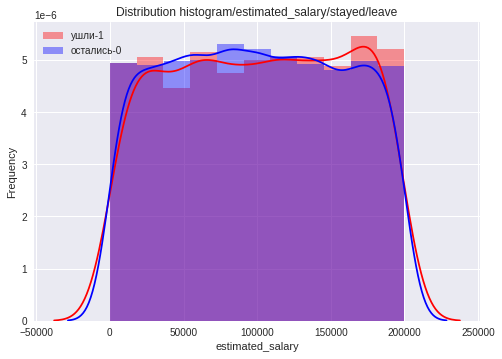

In [100]:
sns.distplot(data.query('churn == 1')['estimated_salary'], bins=11, hist=True, color='red',label='ушли-1')
sns.distplot(data.query('churn == 0')['estimated_salary'], bins=11, hist=True, color='blue',label='остались-0')
plt.style.use('seaborn')
plt.title('Distribution histogram/estimated_salary/stayed/leave')
plt.xlabel('estimated_salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Среди клиентов с высоким доходом отток выше

Создадим группы

In [101]:
data_hypothesis_one = data[data['churn'] == 0]['estimated_salary'].dropna()
data_hypothesis_two = data[data['churn'] == 1]['estimated_salary'].dropna()

In [102]:
display(data_hypothesis_one.mean())
display(data_hypothesis_two.mean())

99738.3861609946

101465.6823760432

Среднее двух выборок примерно равны

In [103]:
from scipy.stats import levene
stat, p = levene(data_hypothesis_one, data_hypothesis_two)
display(p)

0.33797797141969244

Значение по тесту Левене достаточно большое следовательно можно считать дисперсии равными. параметр equal_var будем считать равным 'True'

In [104]:
result = st.ttest_ind(data_hypothesis_one, data_hypothesis_two)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна!')

Нулевая гипотеза верна!


Статистически значимых различий нет, H0 верна.

### Проверка гипотезы различия дохода между теми клиентами, кто пользуется 1-2 продуктами и теми, кто использует 3-4 продукта

Сформулируем нулевую и альтернативную гипотезу

H0 - Доход клиентов, групп 1-2 и 3-4 не различается
H1 - Доход клиентов, групп 1-2 и 3-4 отличается
Гипотеза двухсторонняя

Посмотрим на распределение

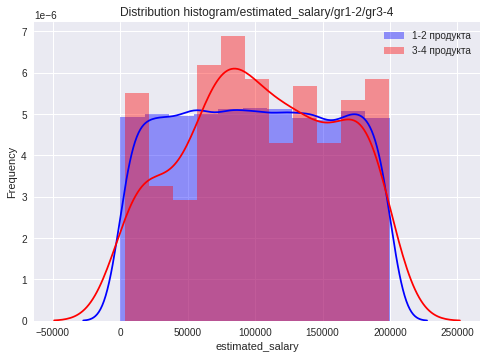

In [105]:
sns.distplot(data.query('products < 3')['estimated_salary'], bins=11, hist=True, color='blue',label='1-2 продукта')
sns.distplot(data.query('products > 2')['estimated_salary'], bins=11, hist=True, color='red',label='3-4 продукта')
plt.style.use('seaborn')
plt.title('Distribution histogram/estimated_salary/gr1-2/gr3-4')
plt.xlabel('estimated_salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

В основном в группах 3 и 4 доход клиентов выше чем в группах 1 и 2

Создадим группы

In [106]:
data_products_one = data[data['products'] < 3]['estimated_salary'].dropna()
data_products_two = data[data['products'] > 2]['estimated_salary'].dropna()

In [107]:
display(data_products_one.mean())
display(data_products_two.mean())

99945.00010336986

104400.10122699387

Здесь так же как и в случаи первой гипотезы средний доход двух выборок примерно равен

In [108]:
from scipy.stats import levene
stat, p = levene(data_products_one, data_products_two)
display(p)

0.11901834298344446

Значение по тесту Левене достаточно большое следовательно можно считать дисперсии равными. параметр equal_var будем считать равным 'True'

In [109]:
result = st.ttest_ind(data_products_one, data_products_two)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна!')

Нулевая гипотеза верна!


Статистически значимых различий нет, H0 верна.

Вывод
В обоих случаях альтернативные гипотезы не подтвердились, в доходах клиентов статистических различий нет. Этот показатель не оказывает влияния на отток клиентов.

## Общий вывод по проекту

Проведя анализ данных пользователей региональных банков в трех городах можно сформировать следующий портрет клиентов склонных разорвать сотрудничество с банком:

Клиенты давно не проявляющие активность с средним возрастом 40+, не имеющих собственность или имеющие 1 объект, склонны покидать банк. 

Больше всего пользователей пользуются 1 продуктом, в этой группе весьма высокий отток клиентов чей баланс на счете зачастую больше нуля.

Клиенты пользующиеся 4 продуктами уходят в 100% случаях, очень высокий отток клиентов и в 3 группе. Оптимальным является использование 2 продуктов банка.

Показатели: 'score', 'estimated_salary' не влияют на отток клиентов. Статистических различий в доходах ушедших клиентов и действующих не выявлено. Также нет различий в доходах 1-2 и 3-4 групп.

Наибольший отток в Ростове Великом, где основной процент приходится на 1 группу. В ней высокий отток среди неактивных пользователей (41%). Здесь же наибольший процент клиентов имеющих в собственности 0-1 объект.

Клиенты с наибольшими показателями дохода часто попадают в отток и при этом пользуются 3-4 продуктами.

## Рекомендации

Следует обратить внимание на аудиторию с возрастом 40+ и разработать новые бонусы и преимущества с целью удержания подобных клиентов. Отличным выбором было бы включить дополнительный кэшбэк за покупки в аптеках и за оплату услуг ЖКХ, с возможностью погашения онлайн через приложение. Бесплатные переводы в другие банки по номеру телефона - в таком возрасте услуга перевода популярна, часто необходимо отправить средства детям, внукам или другим родственникам. А отсутствие комиссии явно завоюет расположение клиента. 

Не предлагать лишних услуг клиентам, кто уже пользуется 2-мя продуктами банка, или же пересмотреть систему предложений.

Клиентам кто пользуется 1 продуктом следует предлагать возможность пользоваться еще какой-то услугой на время бесплатно.

Что касается жителей Ростова Великого, здесь целевая аудитория состоит из клиентов у кого 0-1 объект в собственности и при этом пользуются 1 продуктом. Неплохо было бы пересмотреть процентную ставку по ипотеке, а также предлагать доп. услуги.

### Презентация: https://disk.yandex.ru/i/WTgFt-NqfxXKsw